# Titanic Survival Estimator

In [27]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from jupyterthemes import jtplot
jtplot.style()

# Load Data

In [28]:
x_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
x_test = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = x_train.pop('survived')
y_test = x_test.pop('survived')

# Data Cleaning

In [29]:
x_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [30]:
x_train.shape

(627, 9)

<AxesSubplot:>

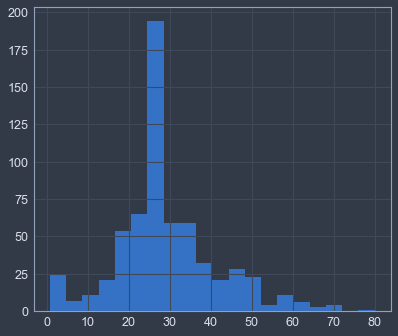

In [31]:
x_train.age.hist(bins=20)

<AxesSubplot:>

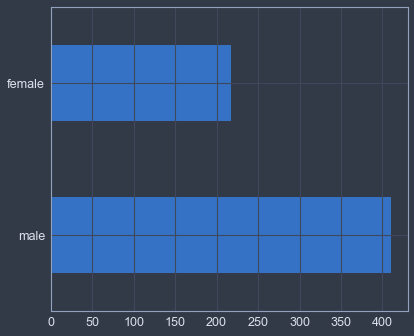

In [32]:
x_train.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

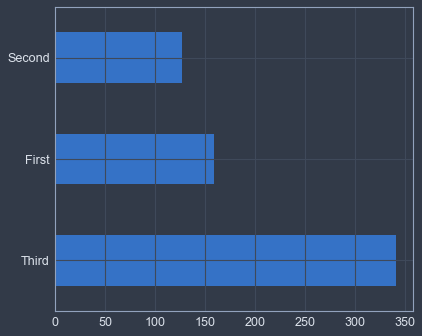

In [33]:
x_train['class'].value_counts().plot(kind='barh')

Text(0.5, 0, 'Survival Percentage')

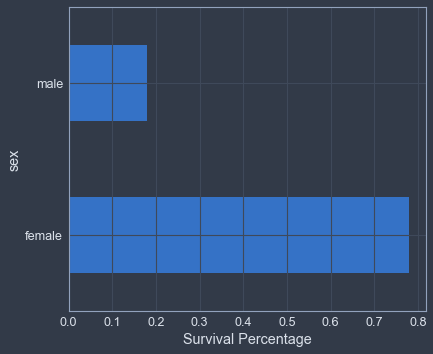

In [34]:
pd.concat([x_train,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('Survival Percentage')

In [35]:
categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']

numerical_columns = ['age', 'fare']

feature_columns = []

for feature_name in categorical_columns:
  vocabulary = x_train[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in numerical_columns:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))


# Model Creation

# Input Function

In [36]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(x_train, y_train)
test_input_fn = make_input_fn(x_test, y_test, num_epochs=1, shuffle=False)

In [37]:
model = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LENOVO\\AppData\\Local\\Temp\\tmp0birwspj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
model.train(train_input_fn)
result = model.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.


C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\LENOVO\AppData\Local\Temp\tmp0birwspj\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 100...
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\LENOVO\AppData\Local\Temp\tmp0birwspj\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 100...
INFO:tensorflow:Loss for final step: 0.5936364.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-08-11T19:27:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restori

# Accuracy

In [39]:
print(result['accuracy']*100)

73.86363744735718
